In [54]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
def load_data(path):
    return pd.read_csv(path)

In [93]:
df = load_data("summer.csv")

In [94]:
df.Discipline.unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [95]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [96]:
def drop_col(col, df):
    df.drop(col, axis = 1, inplace=True)

In [97]:
print(df.columns)

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')


In [98]:
drop_col("Sport", df)

In [99]:
df.columns

Index(['Year', 'City', 'Discipline', 'Athlete', 'Country', 'Gender', 'Event',
       'Medal'],
      dtype='object')

In [100]:
df.head()

,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [453]:
def nan(df):
    df.dropna(axis=0, how = "all",inplace=True)
    df.dropna(axis=1, how = "all",inplace=True)
    return df

In [51]:
df2= df[df["Country"] == "ESP"]

In [53]:
df2.head()

,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
306,1900,Paris,Basque Pelota,"De AMEZOLA y ASPIZUA, José",ESP,Men,Cesta Punta,Gold
307,1900,Paris,Basque Pelota,"VILLOTA BAQUIOLA, Francisco",ESP,Men,Cesta Punta,Gold
3315,1920,Antwerp,Football,"ACEDO, Domingo",ESP,Men,Football,Silver
3316,1920,Antwerp,Football,"ARABOLAZA, Patricio",ESP,Men,Football,Silver
3317,1920,Antwerp,Football,"ARRATE, Mariano",ESP,Men,Football,Silver


In [454]:
def nan(df):
    df.dropna(axis=0, how = "all",inplace=True)
    df.dropna(axis=1, how = "all",inplace=True)
    return df

In [456]:
def filna(df):
    col_n = list(df.select_dtypes(include="object").columns) 
    for col in list(df.columns):
        if col in col_n:
            df.fillna("Not Specified",inplace=True)
        else:
            df.fillna(-1,inplace=True)
    return df

## Gráfico del histórico de las medallas ganadas por España

<AxesSubplot:xlabel='Medal', ylabel='Count'>

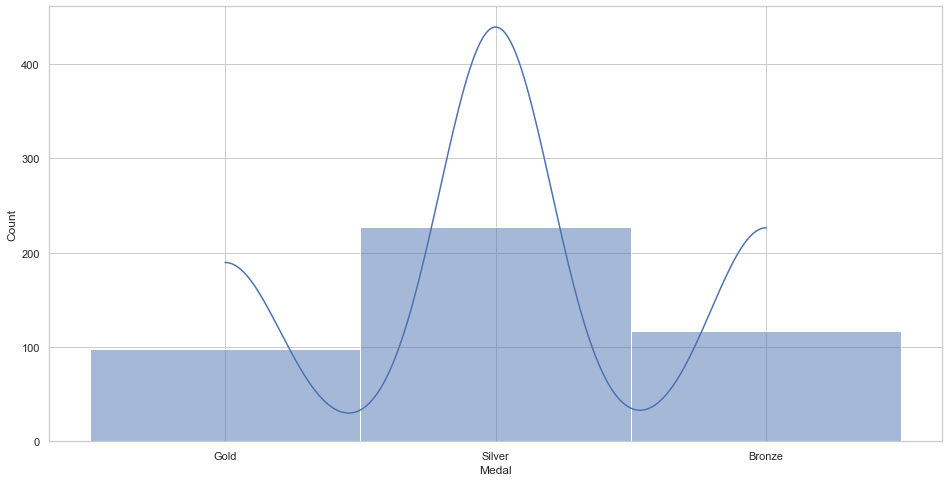

In [57]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,8.)})
sns.set_style("whitegrid")

sns.histplot(x=df2.Medal,kde=True)

In [60]:
medals_per_country = df.Country.value_counts()

In [63]:
medals_per_country.head()

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
Name: Country, dtype: int64

In [68]:
type(medals_per_country)

pandas.core.series.Series

In [88]:
df1 = pd.DataFrame(medals_per_country)

In [89]:
df1.reset_index(inplace = True)

In [90]:
df1.columns = ["Country", "medals"]

In [91]:
df1

,Country,medals
0,USA,4585
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305
...,...,...
142,CIV,1
143,BDI,1
144,SEN,1
145,DJI,1


In [92]:
plus_medals = df1[df1.medals > 1000]

In [81]:
plus_medals

,Country,medals
0,USA,4585
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305
5,ITA,1296
6,AUS,1189
7,HUN,1079
8,SWE,1044


## Ránkig del total de medallas ganadas a lo largo de los años

<AxesSubplot:xlabel='Country', ylabel='medals'>

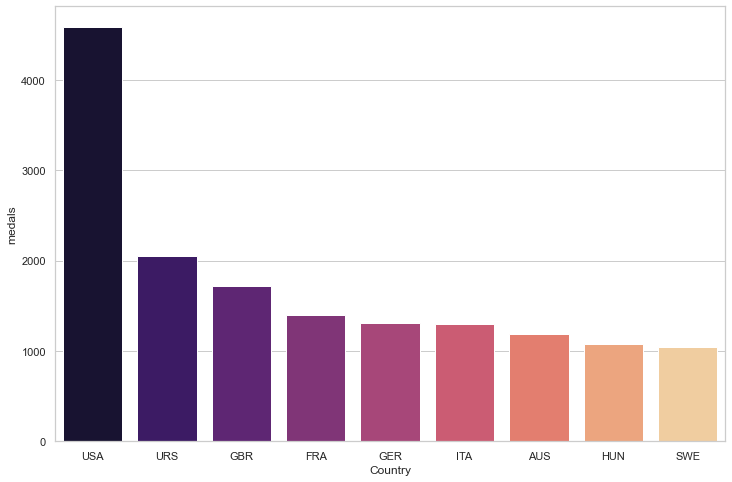

In [372]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Country", y="medals", data=plus_medals, palette="magma")

In [37]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31160    False
31161    False
31162    False
31163    False
31164    False
Length: 31165, dtype: bool

In [38]:
df.Country.unique()

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

# Data from DataSet is only up to 2012 Olimpics

## I need to Scrap two different links for 2016 & 2021 Olympics in order to have the info updated

# 1. Scraping Olympics Río 2016 From Wikipedia

In [417]:
url = "https://es.wikipedia.org/wiki/Anexo:Medallero_de_los_Juegos_Ol%C3%ADmpicos_de_R%C3%ADo_de_Janeiro_2016"

In [418]:
response = requests.get(url)

In [419]:
try:
    response.json()
except:
    print("Response is not JSON")

Response is not JSON


In [420]:
len(response.content)

128100

In [421]:
"<span>" in str(response.content)


True

In [422]:
soup = BeautifulSoup(response.content)


In [423]:
soup.find("title")


<title>Anexo:Medallero de los Juegos Olímpicos de Río de Janeiro 2016 - Wikipedia, la enciclopedia libre</title>

In [424]:
len(soup.find_all("span"))


128

In [425]:
medallas = soup.find_all("table")

In [426]:
len(medallas)


3

In [427]:
for i, t in enumerate(medallas):
    if "Unificado" in str(t) and "45" in str(t):
        print(i)

In [428]:
t = medallas[0]


In [429]:
tbody = t.find("tbody")


In [430]:
trs = tbody.find_all("tr")

In [431]:
len(trs)

88

In [432]:
tr = trs[5]

In [433]:
cols = tr.find_all("td")

In [434]:
cols[5].text.strip()

'42'

In [435]:
def info_rows(row):
    info = dict()
    
    cols = row.find_all("td")
    
    info["rank"] = (cols[0].text)
    info["country"] = cols[1].text.strip()
    info["ngold"] = int(cols[2].text)
    info["nsilver"] = int(cols[3].text)
    info["nbronze"] = int(cols[4].text)
    info["Total"] = (cols[5].text.strip())
    
    return info

In [436]:
info_rows(trs[5])


{'rank': '5',
 'country': 'Alemania\xa0(GER)',
 'ngold': 17,
 'nsilver': 10,
 'nbronze': 15,
 'Total': '42'}

In [437]:
for i, row in enumerate(trs):
    try:
        info_rows(row)
    except:
        print(i)

0


In [438]:
pd.DataFrame([info_rows(row) for row in trs[1:]])

,rank,country,ngold,nsilver,nbronze,Total
0,1,Estados Unidos (USA),46,37,38,121
1,2,Reino Unido (GBR),27,23,17,67
2,3,China (CHN),26,18,26,70
3,4,Rusia (RUS),19,17,20,56
4,5,Alemania (GER),17,10,15,42
...,...,...,...,...,...,...
82,78,Nigeria (NGR),0,0,1,1
83,78,Portugal (POR),0,0,1,1
84,78,Trinidad y Tobago (TTO),0,0,1,1
85,78,Emiratos Árabes Unidos (UAE),0,0,1,1


In [439]:
rio_16 = pd.DataFrame([info_rows(row) for row in trs[1:]])

# 2. Scraping Olympics Tokio 2021 From Wikipedia

In [204]:
url2 = "https://es.wikipedia.org/wiki/Anexo:Medallero_de_los_Juegos_Ol%C3%ADmpicos_de_Tokio_2020"

In [373]:
response2 = requests.get(url2)

In [374]:
len(response.content)

142712

In [375]:
soup2 = BeautifulSoup(requests.get(url2).content)

In [376]:
soup2.find("title")

<title>Anexo:Medallero de los Juegos Olímpicos de Tokio 2020 - Wikipedia, la enciclopedia libre</title>

In [377]:
len(soup2.find_all("span"))

214

In [378]:
tokyo = soup2.find_all("table")

In [379]:
len(tokyo)

3

In [380]:
for i, t in enumerate(tokyo):
    if "Estados" in str(t) and "39" in str(t):
        print(i)

0


In [382]:
t = tokyo[0]

In [383]:
tbody = t.find("tbody")

In [385]:
trs = tbody.find_all("tr")

In [386]:
len(trs)

95

In [387]:
tr = trs[5]

In [389]:
cols = tr.find_all("td")

In [390]:
cols[5].text.strip()

'71'

In [391]:
def rows_tokyo(row):
    info = dict()
    
    cols = row.find_all("td")
    
    info["rank"] = (cols[0].text)
    info["country"] = cols[1].text.strip()
    info["ngold"] = int(cols[2].text)
    info["nsilver"] = int(cols[3].text)
    info["nbronze"] = int(cols[4].text)
    info["Total"] = (cols[5].text.strip())
    
    return info

In [392]:
rows_tokyo(trs[5])

{'rank': '5',
 'country': 'ROC (ROC)',
 'ngold': 20,
 'nsilver': 28,
 'nbronze': 23,
 'Total': '71'}

In [393]:
for i, row in enumerate(trs):
    try:
        rows_tokyo(row)
    except:
        print(i)

0


In [396]:
pd.DataFrame([rows_tokyo(row) for row in trs[1:]])

,rank,country,ngold,nsilver,nbronze,Total
0,1,Estados Unidos (USA),39,41,33,113
1,2,China (CHN),38,32,18,88
2,3,Japón (JPN),27,14,17,58
3,4,Reino Unido (GBR),22,21,22,65
4,5,ROC (ROC),20,28,23,71
...,...,...,...,...,...,...
89,86,Granada (GRN),0,0,1,1
90,86,Kuwait (KUW),0,0,1,1
91,86,Moldavia (MDA),0,0,1,1
92,86,Siria (SYR),0,0,1,1


In [398]:
tokyo_21 = pd.DataFrame([rows_tokyo(row) for row in trs[1:]])

### Once we've scraped both links, I have the data updated

## Vemos que el líder indiscutible sigue siendo EEUU y China se está acercando